# Thyroid Disorder Prediction

This project aims to predict thyroid disorder status using machine learning techniques. It involves building a predictive model that classifies patients based on their medical features. The dataset consists of various clinical tests and lab results, with labels indicating whether a patient is healthy or has a thyroid condition, such as hyperthyroidism or hypothyroidism.

The workflow involves:
- Data preprocessing to handle missing values and categorical variables.
- Addressing class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).
- Training a Random Forest model to predict the diagnosis.
- Evaluating the model’s performance through cross-validation, confusion matrix, and classification report.

## Objective

The primary goal of this project is to build an accurate model that can predict thyroid disease using clinical data. This model can be valuable for medical professionals to quickly identify patients who may need further testing and treatment.

## Dataset Overview

The dataset used in this project includes various features related to thyroid disease diagnostics, including blood test results, gender, and age. The target variable, "diagnosis," consists of three possible classes:
- **Normal**: No thyroid disease.
- **Hypo**: Hypothyroidism (underactive thyroid).
- **Hyper**: Hyperthyroidism (overactive thyroid).

## Methodology

1. **Data Preprocessing**: Handling missing values, encoding categorical features, and scaling numerical features.
2. **Class Imbalance Handling**: We used SMOTE to address class imbalance, ensuring that the model has balanced exposure to all classes.
3. **Model Training**: A Random Forest classifier was trained and evaluated using cross-validation.
4. **Evaluation**: Model performance was evaluated using a confusion matrix, classification report, and accuracy metrics.

## Results

The final model achieved high accuracy in predicting thyroid disease, demonstrating the effectiveness of Random Forest in this medical domain. The classification report includes precision, recall, and F1-score for each class, highlighting the model's performance across all categories.

## Future Work

Future improvements could include exploring other machine learning models, such as Gradient Boosting or Neural Networks, and testing additional preprocessing methods or feature engineering techniques to further improve accuracy.


## 📚 Importing Required Libraries

We begin by importing the essential Python libraries for data processing, model building, and evaluation:

- **pandas**: for working with structured data.
- **numpy**: for numerical operations.
- **matplotlib.pyplot** and **seaborn**: for data visualization.
- **imblearn.pipeline**: for handling pipelines that include oversampling with SMOTE.
- **imblearn.over_sampling.SMOTE**: for handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).
- **collections.Counter**: for counting occurrences of labels in the dataset.
- **sklearn.model_selection.train_test_split**: for splitting the dataset into training and testing sets.
- **sklearn.compose.ColumnTransformer**: for applying transformations to different feature types (categorical, numerical).
- **sklearn.preprocessing.OneHotEncoder**: for encoding categorical features.
- **sklearn.pipeline.Pipeline**: for creating machine learning pipelines.
- **sklearn.impute.SimpleImputer**: for handling missing values.
- **sklearn.model_selection.StratifiedKFold** and **cross_val_score**: for cross-validation.
- **sklearn.ensemble.RandomForestClassifier**: for building the Random Forest model.
- **sklearn.preprocessing.LabelEncoder**: for encoding target labels.
- **sklearn.metrics.confusion_matrix**, **classification_report**, and **ConfusionMatrixDisplay**: for evaluating and displaying model performance.

These libraries will allow us to perform essential tasks like data cleaning, model training, and evaluation.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## 📂 Loading the Thyroid Dataset

We'll now load the dataset from a CSV file using `pandas.read_csv()`.  
Make sure the file path is correct relative to the current notebook location.


In [59]:
df = pd.read_csv("thyroid-dataset.csv")

## 👁️ Previewing and Inspecting the Dataset

Let's preview the first few rows of the dataset using `head()` and view a summary of the dataset using `info()`:

- **`head()`** shows the top 5 rows so we can understand the structure.
- **`info()`** helps us check data types and non-null counts.


In [60]:
display(df.head())
df.info()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,diagnosis
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

## 🔍 Removing Redundant "Measured" Columns

Some features in the dataset, such as `"TSH measured"`, `"T3 measured"`, etc., are redundant. These columns only indicate whether the corresponding hormone level was measured, which is already implicitly clear based on whether the value in the actual hormone level column (`TSH`, `T3`, etc.) is missing or not.

We'll remove the following redundant "measured" columns to clean up the dataset:


In [61]:
# Define redundant columns to drop
measured_columns = [
    "TSH measured", "T3 measured", "TT4 measured",
    "T4U measured", "FTI measured", "TBG measured"
]

# Drop them from the DataFrame
df.drop(columns=measured_columns, inplace=True)

# Confirm removal
print("Dropped columns:", measured_columns)

Dropped columns: ['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']


## 🔄 Mapping the Diagnosis Column

Map the entries of the `diagnosis` column to three categories: **hyper**, **hypo**, and **normal**. This transformation is based on the information provided in the `thyroid.names` file, which contains a list of possible diagnosis codes and their corresponding conditions.

The reasoning behind this mapping is to categorize the diagnoses into distinct thyroid-related conditions:

- **hyper**: Represents hyperthyroid conditions (e.g., T3 toxic, toxic goitre, etc.).
- **hypo**: Represents hypothyroid conditions (e.g., primary hypothyroid, compensated hypothyroid, etc.).
- **normal**: For cases that are neither hyperthyroid nor hypothyroid, such as non-thyroidal conditions, treatments, or no condition at all. This helps us focus on the two main categories of thyroid dysfunction while excluding irrelevant cases.


In [62]:
diagnosis_map = {
    'A': 'hyper',  # hyperthyroid
    'B': 'hyper',  # T3 toxic
    'C': 'hyper',  # toxic goitre
    'D': 'hyper',  # secondary toxic
    'E': 'hypo',   # hypothyroid
    'F': 'hypo',   # primary hypothyroid
    'G': 'hypo',   # compensated hypothyroid
    'H': 'hypo',   # secondary hypothyroid
    'I': 'normal',  # increased binding protein (non-thyroidal)
    'J': 'normal',  # decreased binding protein (non-thyroidal)
    'K': 'normal',  # concurrent non-thyroidal illness (non-thyroidal)
    'L': 'normal',  # consistent with replacement therapy (non-thyroidal)
    'M': 'normal',  # underreplaced (non-thyroidal)
    'N': 'normal',  # overreplaced (non-thyroidal)
    'O': 'normal',  # antithyroid drugs (treatment, not a condition)
    'P': 'normal',  # I131 treatment (treatment, not a condition)
    'Q': 'normal',  # surgery (treatment, not a condition)
    'R': 'normal',  # discordant assay results (general observation)
    'S': 'normal',  # elevated TBG (general observation)
    'T': 'normal'   # elevated thyroid hormones (general observation)
}

# Apply the transformation to the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].apply(lambda x: diagnosis_map.get(x[0], 'normal'))

# Display the updated DataFrame
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral source,diagnosis
0,29,F,f,f,f,f,f,f,f,t,...,f,f,0.3,?,?,?,?,?,other,normal
1,29,F,f,f,f,f,f,f,f,f,...,f,f,1.6,1.9,128,?,?,?,other,normal
2,41,F,f,f,f,f,f,f,f,f,...,f,f,?,?,?,?,?,11,other,normal
3,36,F,f,f,f,f,f,f,f,f,...,f,f,?,?,?,?,?,26,other,normal
4,32,F,f,f,f,f,f,f,f,f,...,f,f,?,?,?,?,?,36,other,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,?,?,64,0.83,77,?,SVI,normal
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,?,?,91,0.92,99,?,SVI,normal
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,?,?,113,1.27,89,?,SVI,normal
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,?,?,75,0.85,88,?,other,normal


## 📈 Hormone Level Distributions

Analyze the distribution of hormone levels in the dataset. The goal is to visualize the frequency of measurements for various thyroid-related hormones, including TSH, T3, TT4, T4U, FTI, and TBG. By examining the histograms, we can determine if any values deviate significantly from expected or reasonable ranges. These insights will help refine our valid ranges and identify any discrepancies in the data.

We first ensure that the hormone-related columns are numeric, coercing any invalid values to `NaN`. Then, we plot the histograms for each of these columns to better understand the distribution of values.

The key columns analyzed are:
- **TSH**: Thyroid-stimulating hormone
- **T3**: Triiodothyronine
- **TT4**: Total Thyroxine
- **T4U**: Thyroxine Uptake
- **FTI**: Free Thyroxine Index
- **TBG**: Thyroxine-binding globulin


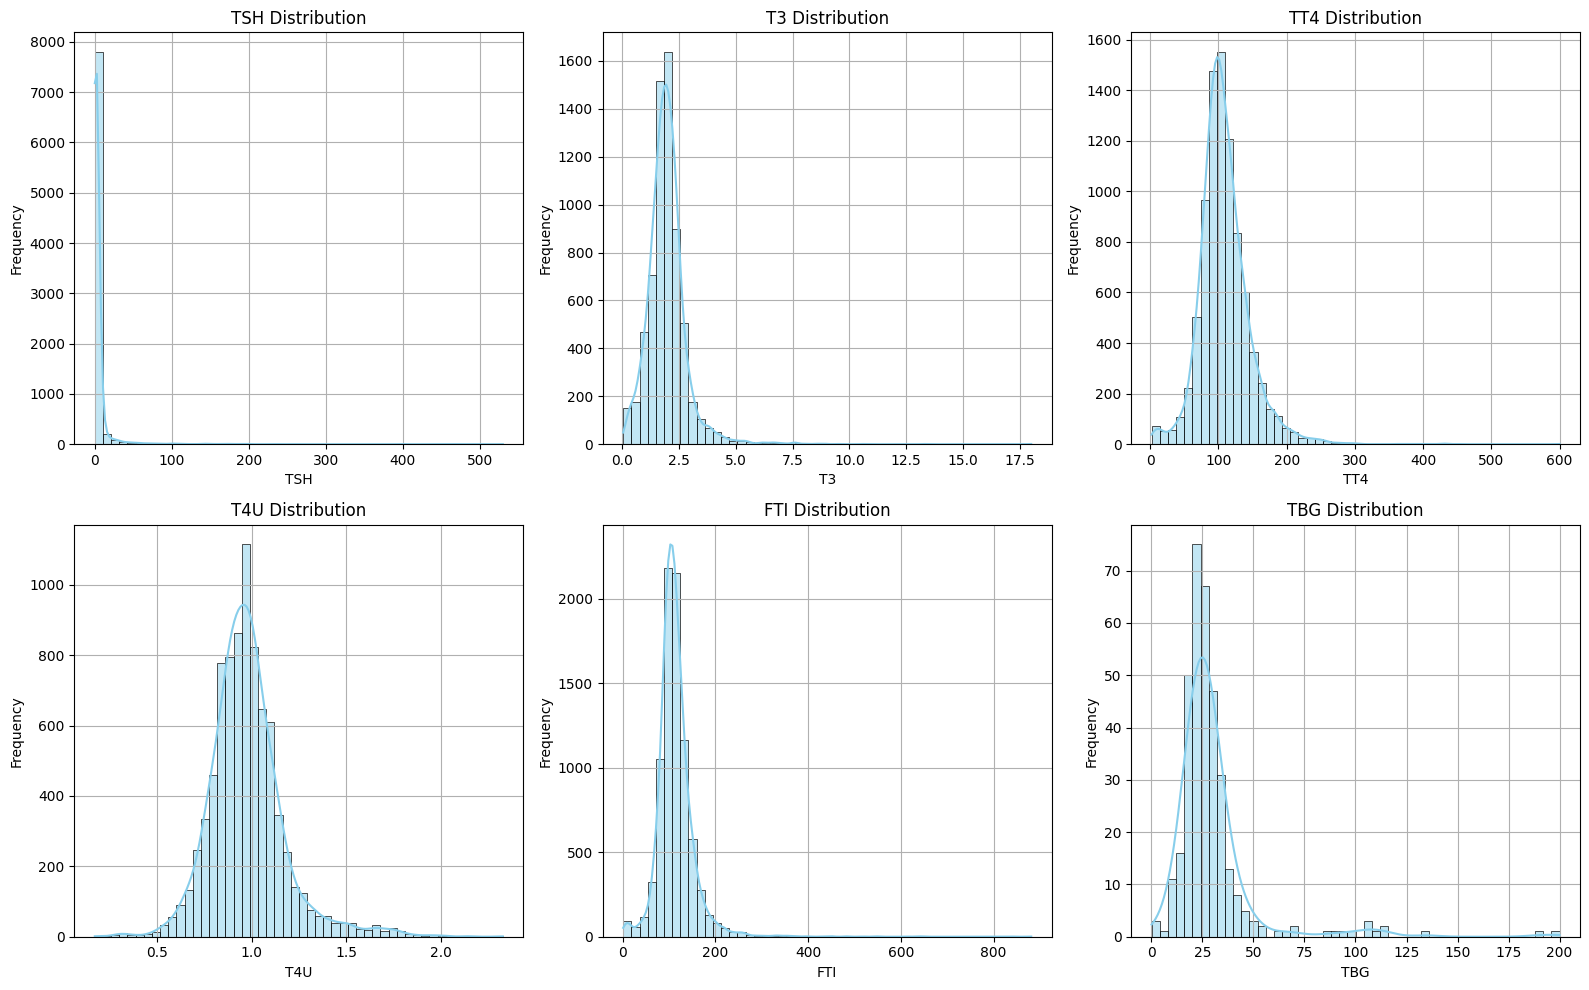

In [63]:
# List of hormone-related columns
hormone_cols = ["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]

# Ensure columns are numeric (coerce errors to NaN)
df[hormone_cols] = df[hormone_cols].apply(pd.to_numeric, errors='coerce')

# Plot histograms
plt.figure(figsize=(16, 10))
for i, col in enumerate(hormone_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

## 📊 Dataset Feature Description with Valid Ranges

In this cell, we define a comprehensive description of each feature in the dataset along with the **valid value ranges** for each attribute. These ranges help us identify any values that fall outside of what is considered logically valid based on the dataset's context. By setting valid ranges for each feature, we can spot incorrect or extreme values that may require further review or removal.

- **Feature Name**: The name of the column or attribute in the dataset.
- **Description**: A brief explanation of the feature and its significance.
- **Valid Range**: The expected range of valid values for each feature. This includes bounds that are typically acceptable within the dataset's context and medical norms where applicable, such as hormone levels.



In [64]:
dataset_description = {
    "Feature Name": [
        "age", "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick", "pregnant",
        "thyroid surgery", "I131 treatment", "query hypothyroid", "query hyperthyroid", "lithium", "goitre",
        "tumor", "hypopituitary", "psych", "TSH", "T3", "TT4", "T4U", "FTI", "TBG", "referral source", "diagnosis"
    ],
    "Description": [
        "Patient's age", "Gender (M/F)", "Uses Thyroxine hormone", "Query about Thyroxine use",
        "On antithyroid medication", "Patient is sick", "Patient is pregnant", "Had thyroid surgery",
        "Received I131 radiation treatment", "Query hypothyroidism", "Query hyperthyroidism",
        "Elevated lithium levels", "Enlarged thyroid (goitre)", "Tumor present", "Hypopituitary condition present",
        "Psychiatric condition present", "Thyroid-stimulating hormone (TSH) level", "Triiodothyronine (T3) level",
        "Total Thyroxine (TT4) level", "Thyroid Uptake (T4U) level", "Free Thyroxine Index (FTI) level",
        "Thyroxine Binding Globulin (TBG) level", "Referral source (hospital, clinic, etc.)", "Final diagnosis"
    ],
    "Valid Range": [
        "0-120", "M/F", "t/f", "t/f", "t/f", "t/f", "t/f", "t/f", "t/f", "t/f",
        "t/f", "t/f", "t/f", "t/f", "t/f", "t/f", "0-250", "0-15", "0-500",
        "0-3", "0-600", "0-400", "hospital/clinic/other", "hyper/hypo/normal"
    ]
}

# Convert to DataFrame and display
description_df = pd.DataFrame(dataset_description)
display(description_df)


,Feature Name,Description,Valid Range
0,age,Patient's age,0-120
1,sex,Gender (M/F),M/F
2,on thyroxine,Uses Thyroxine hormone,t/f
3,query on thyroxine,Query about Thyroxine use,t/f
4,on antithyroid medication,On antithyroid medication,t/f
5,sick,Patient is sick,t/f
6,pregnant,Patient is pregnant,t/f
7,thyroid surgery,Had thyroid surgery,t/f
8,I131 treatment,Received I131 radiation treatment,t/f
9,query hypothyroid,Query hypothyroidism,t/f


## 📏 Parsing Feature Constraints

We convert the textual `Valid Range` descriptions from the dataset documentation into a usable dictionary of constraints for validation.  
This gives us a clean and flexible way to detect invalid values for each attribute.


In [65]:
valid_ranges = {}

for _, row in description_df.iterrows():
    col = row["Feature Name"]
    raw_range = row["Valid Range"]

    if "-" in raw_range and all(part.replace('.', '', 1).isdigit() for part in raw_range.split('-')):
        # Numeric range, e.g., "0.5-5"
        start, end = map(float, raw_range.split('-'))
        valid_ranges[col] = (start, end)
    elif "/" in raw_range:
        # Categorical values, e.g., "True/False", "M/F"
        valid_ranges[col] = raw_range.split('/')
    else:
        # Single value or unknown format
        valid_ranges[col] = [raw_range]

## 🧪 Validating Data Against Defined Ranges

Now that we have parsed the valid ranges for each feature into a structured dictionary, we proceed to identify invalid values across the dataset.

For each column:
- We compare values to their expected numeric or categorical constraints.
- We compute how many entries are invalid and what percentage they represent.
- Based on the importance and volume of the invalid data, we propose a cleaning **strategy**:
  - `✓ Valid`: No invalid values found.
  - `Drop rows`: If invalids are very few and the column is important.
  - `Fill with mode`: For categorical columns with significant invalid data.
  - `Impute with median`: For numeric columns to preserve distribution.

This provides a persistent and explainable approach to data cleaning.


In [66]:
# Step 1: Identify invalid entries using valid_ranges
invalid_summary = {
    "Column": [],
    "Invalid Count": [],
    "Invalid %": [],
    "Strategy": []
}

total_rows = len(df)

for col, valid_range in valid_ranges.items():
    if isinstance(valid_range, tuple):  # Numeric range
        min_val, max_val = valid_range
        try:
            invalid_mask = ~df[col].astype(float).between(min_val, max_val)
        except:
            invalid_mask = pd.Series([True] * total_rows)  # If conversion fails, mark all as invalid
    elif isinstance(valid_range, list):  # Categorical values
        invalid_mask = ~df[col].isin(valid_range)
    else:
        continue  # Skip columns without a clear valid range

    invalid_count = invalid_mask.sum()
    invalid_pct = invalid_count / total_rows * 100

    # Step 2: Propose strategy
    if invalid_count == 0:
        strategy = "✓ Valid"
    elif invalid_pct < 2 and col not in ["referral source"]:  # drop rows if few and important
        strategy = "Drop rows"
    elif df[col].dtype == "object":
        strategy = "Fill with mode"
    else:
        strategy = "Impute with median"

    invalid_summary["Column"].append(col)
    invalid_summary["Invalid Count"].append(invalid_count)
    invalid_summary["Invalid %"].append(round(invalid_pct, 2))
    invalid_summary["Strategy"].append(strategy)

# Step 3: Display as DataFrame
invalids_df = pd.DataFrame(invalid_summary)
invalids_df.sort_values("Invalid Count", ascending=False, inplace=True)

display(invalids_df)

,Column,Invalid Count,Invalid %,Strategy
21,TBG,8823,96.19,Impute with median
22,referral source,3679,40.11,Fill with mode
17,T3,2605,28.40,Impute with median
16,TSH,858,9.35,Impute with median
19,T4U,809,8.82,Impute with median
20,FTI,808,8.81,Impute with median
18,TT4,443,4.83,Impute with median
1,sex,307,3.35,Fill with mode
0,age,4,0.04,Drop rows
6,pregnant,0,0.00,✓ Valid


### 🧹 Data Cleaning: Applying Strategies

Now that we’ve identified invalid values and proposed cleanup methods, we apply these strategies:

- Drop rows with a small number of critical invalid entries.
- Fill categorical columns with their most common (mode) value.
- Impute numeric values using the column's median.

This step ensures we retain as much valid information as possible while maintaining consistency in the dataset.


In [67]:
# Create a copy of the DataFrame to preserve the original
df_cleaned = df.copy()

for _, row in invalids_df.iterrows():
    col = row["Column"]
    strategy = row["Strategy"]

    if strategy == "Drop rows":
        min_val, max_val = valid_ranges[col]
        df_cleaned = df_cleaned[df_cleaned[col].astype(float).between(min_val, max_val)]

    elif strategy == "Fill with mode":
        mode_val = df_cleaned[col].mode()[0]
        df_cleaned[col] = df_cleaned[col].fillna(mode_val)

    elif strategy == "Impute with median":
        median_val = df_cleaned[col].median()
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
        df_cleaned[col] = df_cleaned[col].fillna(median_val)

# Check shape before and after
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)


Original shape: (9172, 24)
Cleaned shape: (9168, 24)


## ⚖️ Class Distribution & Imbalance Detection

Before training our model, it's essential to examine the class distribution of our target variable, `diagnosis`. An imbalanced dataset can lead to a biased model that performs well only on the majority class, while failing to detect rare but critical conditions.

In this step, we'll:
- Visualize the class distribution.
- Identify potential class imbalance.
- Propose a balancing strategy, such as oversampling using SMOTE or applying class weights.


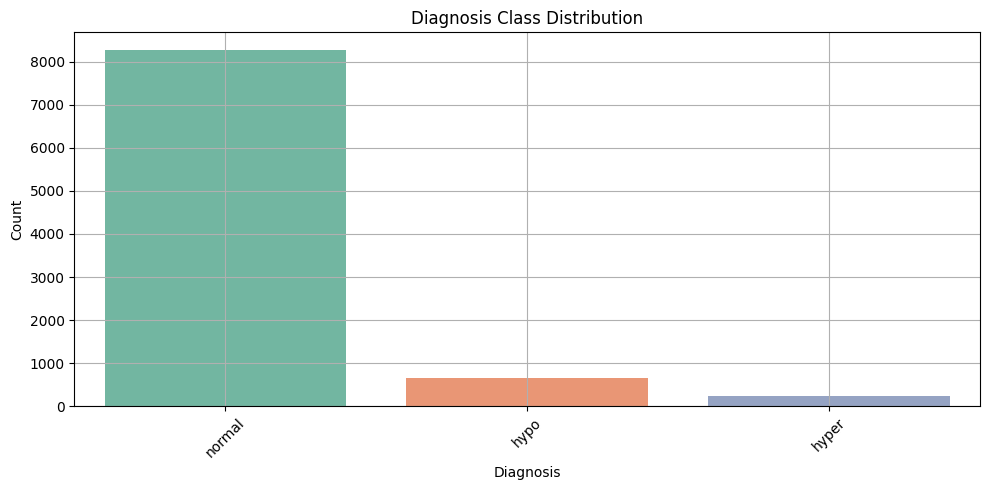

In [68]:
# Check distribution of the target column
plt.figure(figsize=(10, 5))
sns.countplot(x='diagnosis', hue='diagnosis', data=df, order=df['diagnosis'].value_counts().index, palette="Set2", legend=False)
plt.title("Diagnosis Class Distribution")
plt.xticks(rotation=45)
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

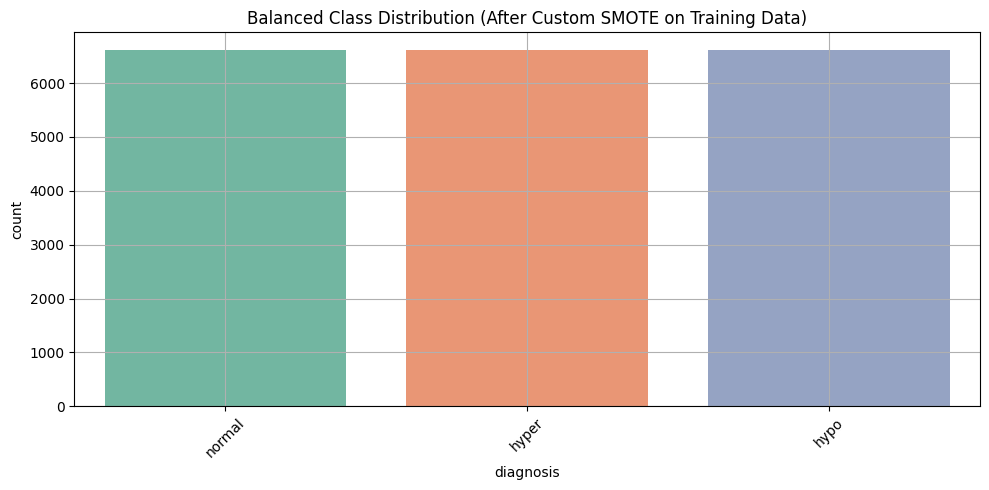

In [69]:
# Split features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Separate categorical and numeric features
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode target labels after SMOTE
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Compute target samples per class (we’ll make all classes equal to the max class count)
class_counts = Counter(y_train)
target_samples = max(class_counts.values())
sampling_strategy = {
    label: target_samples
    for label, count in class_counts.items()
    if count < target_samples
}

# Create full pipeline with custom SMOTE, applied only on the training data
smote_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(sampling_strategy=sampling_strategy, random_state=42))
])

# Apply the pipeline only on training data (using original `y_train` for SMOTE)
X_train_resampled, y_train_resampled = smote_pipeline.fit_resample(X_train, y_train)

# Encode the resampled target labels
y_train_resampled_encoded = le.transform(y_train_resampled)

# Get feature names after preprocessing (after SMOTE and transformations)
feature_names = smote_pipeline.named_steps["preprocessor"].get_feature_names_out()

# Convert X_train_resampled to DataFrame with correct column names
df_balanced = pd.DataFrame(X_train_resampled, columns=feature_names)
df_balanced["diagnosis"] = y_train_resampled_encoded

# Convert the encoded labels back to original labels for plotting
df_balanced["diagnosis"] = le.inverse_transform(df_balanced["diagnosis"])

# Check new class distribution (in training data after SMOTE)
plt.figure(figsize=(10, 5))
sns.countplot(x="diagnosis", hue="diagnosis", data=df_balanced, order=df_balanced["diagnosis"].value_counts().index, palette="Set2", legend=False)
plt.title("Balanced Class Distribution (After Custom SMOTE on Training Data)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# Encode target labels as integers (only for training set after SMOTE)
le = LabelEncoder()
y_train_res_encoded = le.fit_transform(y_train_resampled)

# Define Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate on resampled training data
scores = cross_val_score(model, X_train_resampled, y_train_res_encoded, cv=cv, scoring='accuracy')

# Optional: Store in a DataFrame if needed
results_df = pd.DataFrame({
    "Mean Accuracy": [np.mean(scores)],
    "Std Dev": [np.std(scores)]
}, index=["Random Forest"])

# Display results
display(results_df)

,Mean Accuracy,Std Dev
Random Forest,0.994454,0.000504


## 💡 Model Training and Feature Importance
Training a Random Forest model on the balanced dataset (after applying SMOTE to address class imbalance). The goal is to identify the features that contribute the most to the model's decision-making process.

Feature importance analysis helps us understand which variables are most influential in predicting the target variable. For this analysis, we combined both the original numeric features and the one-hot encoded categorical features, ensuring we assess the true impact of all input features.

Below, you’ll find a plot showcasing the top 20 most important features based on the Random Forest model.


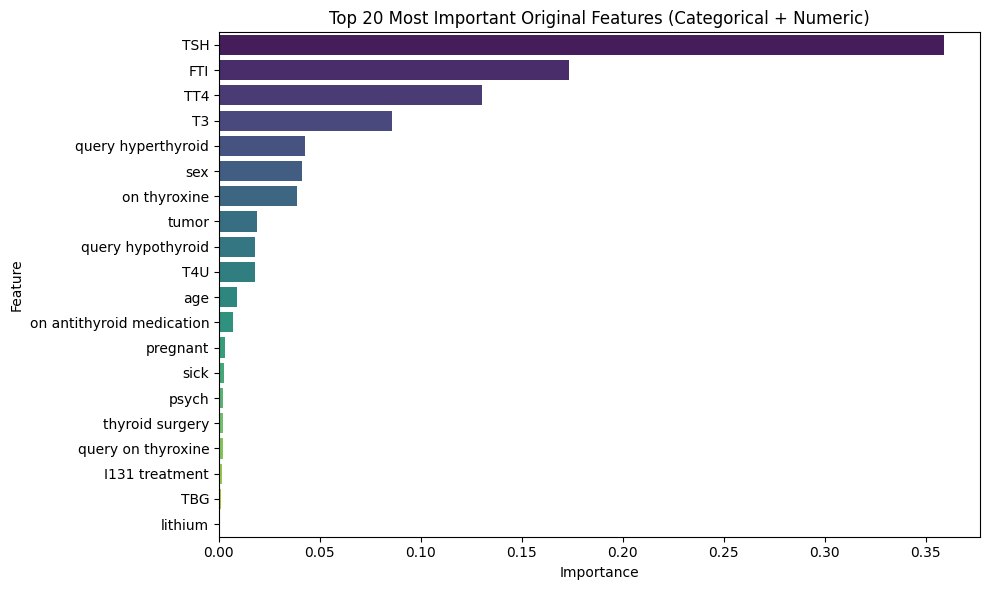

In [71]:
# Retrain Random Forest on the resampled training dataset
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_res_encoded)

# Get feature importances
importances = model.feature_importances_

# Categorical features' one-hot encoded names
categorical_feature_names = smote_pipeline.named_steps["preprocessor"].transformers_[1][1].named_steps["encoder"].get_feature_names_out(input_features=categorical_cols)

# Numeric feature names (unchanged)
numeric_feature_names = numeric_cols

# Combine the feature names (including both numeric and categorical)
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Aggregating the importances for the original features
aggregated_importances = {}

# For numeric features, the importance stays the same
for feature, importance in zip(numeric_feature_names, importances[:len(numeric_feature_names)]):
    aggregated_importances[feature] = importance

# For categorical features, sum the importances of one-hot encoded columns corresponding to each categorical feature
categorical_idx_start = len(numeric_feature_names)
for i, cat_feature in enumerate(categorical_cols):
    # Get the one-hot encoded feature names for this categorical feature
    one_hot_columns = categorical_feature_names[i * len(smote_pipeline.named_steps["preprocessor"].transformers_[1][1].named_steps["encoder"].categories_[i]): (i + 1) * len(smote_pipeline.named_steps["preprocessor"].transformers_[1][1].named_steps["encoder"].categories_[i])]

    # Sum the importances of these one-hot encoded features
    aggregated_importances[cat_feature] = np.sum(importances[categorical_idx_start:categorical_idx_start + len(one_hot_columns)])
    categorical_idx_start += len(one_hot_columns)

# Create a DataFrame with the aggregated importances
aggregated_feat_df = pd.DataFrame({
    "Feature": list(aggregated_importances.keys()),
    "Importance": list(aggregated_importances.values())
}).sort_values(by="Importance", ascending=False).head(20)

# Plot top 20 important original features
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated_feat_df, x="Importance", y="Feature", hue="Feature", dodge=False, legend=False, palette="viridis")
plt.title("Top 20 Most Important Original Features (Categorical + Numeric)")
plt.tight_layout()
plt.show()


## 📊 Model Evaluation: Confusion Matrix and Classification Report

In this step, we evaluate the performance of the trained model on the test set. We preprocess the test set using the same pipeline that was applied to the training data. After that, we make predictions and generate a confusion matrix along with a classification report to assess precision, recall, and f1-score across different classes.


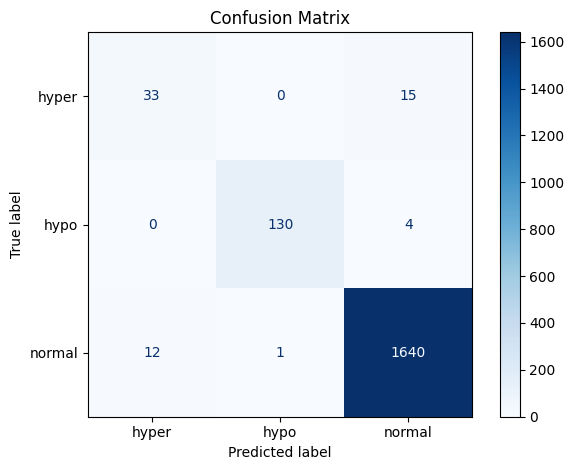

              precision    recall  f1-score   support

       hyper       0.73      0.69      0.71        48
        hypo       0.99      0.97      0.98       134
      normal       0.99      0.99      0.99      1653

    accuracy                           0.98      1835
   macro avg       0.90      0.88      0.89      1835
weighted avg       0.98      0.98      0.98      1835



In [72]:
# Preprocess the test set using the same pipeline as the training set
X_test_processed = smote_pipeline.named_steps["preprocessor"].transform(X_test)

# Get predictions on the processed test set
y_pred = model.predict(X_test_processed)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report
class_report = classification_report(y_test_encoded, y_pred, target_names=le.classes_)
print(class_report)


## 📝 Final Conclusions

In this project, we successfully applied a series of machine learning techniques to predict thyroid conditions based on various features. We followed a structured approach, including data preprocessing, handling class imbalance with SMOTE, and training a Random Forest Classifier. The model was evaluated using Stratified Cross-Validation and the final performance was assessed using a confusion matrix and classification report.

**Key Findings:**
- The model showed a strong ability to classify the different thyroid conditions, with an accuracy of approximately 98%.
- The recall and precision values for the "hypo" and "normal" classes were particularly high, indicating robust classification performance for these classes.
- The model’s performance on the "hyper" class, while still good, could be further improved, potentially through additional data augmentation or model tuning.

**Potential Improvements:**
- Further tuning of hyperparameters such as the number of estimators and max depth in the Random Forest could lead to improved accuracy, especially for the "hyper" class.
- Exploring other models such as XGBoost or neural networks could yield even better results, especially with hyperparameter optimization.
- Additional features or domain-specific knowledge might further improve predictions, especially for the rare classes.

Overall, the project demonstrated how to deal with imbalanced datasets, perform preprocessing effectively, and assess model performance through common evaluation metrics.
